# Using ChatGPT for Keyword Extraction and Named Entity Recognition
    Prepared by: Pat Estrada

## Setup libraries and data loading

In [1]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 7.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: openai
    Found existing installation: openai 1.34.0
    Uninstalling openai-1.34.0:
      Successfully uninstalled openai-1.34.0


In [2]:
# Import necessary libraries
import pandas as pd
from openai import OpenAI

In [4]:
df = pd.read_csv('rappler-2024-cleaned.csv')

keyword = 'schools'

df_sample = df[
    (df['title.cleaned'].str.contains(keyword, case=False)) |
    (df['content.cleaned'].str.contains(keyword, case=False))
].reset_index(drop=True).head(10).copy()

df_sample

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned
0,2631396,phildec-2-experts-discuss-digital-rights-democ...,PhilDec 2.0: Experts discuss digital rights an...,\n<p>Recognizing the evolving digital landscap...,<p>&#8216;The digital economy as we were looki...,https://www.rappler.com/technology/phildec-2-e...,2024-03-31T11:13:32,2024-04-03T10:35:38,[732],PhilDec 2.0: Experts discuss digital rights an...,Recognizing the evolving digital landscape s...
1,2629524,moving-flood-prone-government-facilities-costl...,Moving flood-prone gov’t facilities out of har...,"\n<p class=""has-text-align-center""><strong>REA...",<p>Part 2: Experts say that moving all critica...,https://www.rappler.com/environment/moving-flo...,2024-03-29T08:30:00,2024-03-28T14:02:53,"[16490, 793, 709, 708, 701]",Moving flood-prone gov't facilities out of har...,READ: Part 1 | Flood-prone lifelines: Cr...
2,2629483,critical-facilities-risk-flooding-sipalay-city...,Flood-prone lifelines: Critical facilities at ...,"\n<p class=""has-drop-cap"">NEGROS OCCIDENTAL, P...",<p>Part 1: Rappler&#8217;s data analysis of Ha...,https://www.rappler.com/environment/critical-f...,2024-03-28T08:30:00,2024-04-01T11:12:08,"[16490, 793, 709, 708, 701]",Flood-prone lifelines: Critical facilities at ...,"NEGROS OCCIDENTAL, Philippines - It was pitc..."
3,2629925,medical-technologists-licensure-march-2024,RESULTS: March 2024 Medical Technologists Lice...,\n<p><em>The following is a press release from...,"<p>PRESS RELEASE: 7,309 out of 9,068 examinees...",https://www.rappler.com/bulletin-board/examina...,2024-03-27T19:10:25,2024-03-27T19:21:33,"[620, 21932]",RESULTS: March 2024 Medical Technologists Lice...,The following is a press release from the P...
4,2629187,free-to-disagree-despicable-broadcasters-who-i...,"[Free to disagree] Patiño and Tabar: Dim, devi...",\n<p>For most of my professional life I have b...,<p>The Cebu broadcasters should be held to acc...,https://www.rappler.com/voices/thought-leaders...,2024-03-27T14:32:20,2024-03-27T14:32:25,[758],"[Free to disagree] Patino and Tabar: Dim, devi...",For most of my professional life I have been...
5,2628868,process-kids-aged-1-4-get-national-id,Here’s the step-by-step process of getting nat...,"\n<p>MANILA, Philippines – The Philippine Stat...",<p>Here&#8217;s the list of requirements to re...,https://www.rappler.com/business/process-kids-...,2024-03-26T13:52:55,2024-03-26T13:53:01,"[621, 622]",Here's the step-by-step process of getting nat...,"MANILA, Philippines - The Philippine Statist..."
6,2628814,online-dswd-form-education-aid-fake,FACT CHECK: Online DSWD form for education aid...,\n<p><strong>Claim:</strong> The Department of...,<p>The Department of Social Welfare and Develo...,https://www.rappler.com/newsbreak/fact-check/o...,2024-03-26T13:02:37,2024-03-26T13:03:13,"[712, 708]",FACT CHECK: Online DSWD form for education aid...,Claim: The Department of Social Welfare an...
7,2628421,de-la-salle-university-students-win-grant-cafe...,DLSU students win P1-million grant for cafeter...,"\n<p>MANILA, Philippines – Three students from...","<p>Every year, De La Salle University’s cafete...",https://www.rappler.com/environment/de-la-sall...,2024-03-25T17:49:01,2024-03-26T14:57:02,"[621, 793]",DLSU students win P1-million grant for cafeter...,"MANILA, Philippines - Three students from De..."
8,2627915,profile-anya-alindada-journey-international-ba...,The Filipina ballerina: Anya Alindada on her j...,\n<p>When asked what it was about ballet that ...,<p>&#8216;I am so grateful and honored to have...,https://www.rappler.com/life-and-style/arts-cu...,2024-03-24T18:15:12,2024-03-24T18:15:15,"[685, 16490, 646]",The Filipina ballerina: Anya Alindada on her j...,When asked what it was about ballet that mad...
9,2627659,opinion-urgent-appeal-amend-gcta-law,[OPINION] An urgent appeal to amend the GCTA law,\n<p>The Good Conduct Time Allowance (GCTA) La...,<p>The lack of power t

## Initialize OpenAI

In [6]:
api_key = open('openaiapikey.txt', 'r').read()
client = OpenAI(api_key=api_key)

## Keyword extraction using ChatGPT

Keyword extraction with ChatGPT relies on the model's understanding of the context to identify significant terms in a document. GPT-based keyword extraction considers the entire document's context, allowing it to capture semantic relationships between words and phrases.

Compared to traditional methods like TF-IDF, ChatGPT's keyword extraction can provide more nuanced and contextually relevant results.

In [8]:
article = df_sample['content.cleaned'].iloc[0]
article

'  Recognizing the evolving digital landscape shaped by technical advancements and socio-technical realities, professionals discussed the impact of digital advancements on Philippine democracy and rights in the Philippine Declaration of Internet Rights and Principles (PhilDec 2.0).      The plenary session of the Digital Rights Conference, held at Ateneo de Manila University last Thursday, March 21, also featured discussions on several key points, including artificial intelligence (AI), human rights, gender, environmental sustainability, and the post-pandemic digital ecosystems.      Alan Alegre, former executive director of the Foundation for Media Alternatives (FMA), along with other information and communications technology (ICT), media and human rights experts, stressed the need for an updated declaration. It addresses challenges made more difficult by the digital economy, such as the digital divide, hijacked democracies, disinformation, and the post-pandemic effects on digital rig

Customizing a prompt to ChatGPT using OpenAI is easy. Users simply have to pass messages to the model to get a result.

In [10]:
# Sample custom prompt
client.chat.completions.create(
    model='gpt-3.5-turbo',
    messages = [
        {'role': 'user',
         'content': f'Extract the main keywords from this news article: \n\n{article}'   
    }
    ]
)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************JYMW. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

Now, we can further refine this prompt by adding multiple prompt messages, each with a different role. In addition to the `user prompt` or `main prompt`, we can set a `system prompt` to establish context for the ChatGPT API, informing it of its intended task. Here, we designate the role as "system" because we are providing instructions to the ChatGPT system. 

Below, we specify the content of our `system prompt` and refine our `main prompt`.

In [13]:
system_prompt = 'You are a news analyst assistant tasked to extract keywords from news articles.'

main_prompt = """
###TASK###
Extract the five most crucial keywords from the news article and present them in a comma-separated list.

###ARTICLE###
"""

In [17]:
response = client.chat.completions.create(
    model='gpt-3.5-turbo',
    messages = [
        {'role': 'system', 'content': system_prompt},
        {'role': 'user',
         'content': f'{main_prompt}\n{article}'   
    }
    ]
)
response

ChatCompletion(id='chatcmpl-9cockPWR0C9dgNjo50IZFsAcRYuAy', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='digital advancements, human rights, AI, internet rights, gender', role='assistant', function_call=None, tool_calls=None))], created=1719038090, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=12, prompt_tokens=1109, total_tokens=1121))

In [23]:
# How to access content of model response
keywords = response.choices[0].message.content
[kw.strip() for kw in keywords.split(',')]

['digital advancements', 'human rights', 'AI', 'internet rights', 'gender']

Now, we demonstrate a sample pipeline for keyword extraction with ChatGPT.

In [35]:
# Function to extract keywords using GPT
def extract_keywords(text):
    system_prompt = 'You are a news analyst assistant tasked to extract keywords from news articles.'

    main_prompt = """
    ###TASK###
    Extract the five most crucial keywords from the news article and present them in a comma-separated list.
    
    ###ARTICLE###
    """
    try:
        response = client.chat.completions.create(
        model='gpt-3.5-turbo',
        messages = [
            {'role': 'system', 'content': system_prompt},
            {'role': 'user',
             'content': f'{main_prompt}\n{text}'   
        }
        ]
        )
    
        keywords = response.choices[0].message.content
        return[kw.strip() for kw in keywords.split(',')]
        
    except Exception as e:
        print(e)
        return []
        

In [37]:
df_sample['keywords'] = df_sample['content.cleaned'].apply(extract_keywords)
df_sample

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned,keywords
0,2631396,phildec-2-experts-discuss-digital-rights-democ...,PhilDec 2.0: Experts discuss digital rights an...,\n<p>Recognizing the evolving digital landscap...,<p>&#8216;The digital economy as we were looki...,https://www.rappler.com/technology/phildec-2-e...,2024-03-31T11:13:32,2024-04-03T10:35:38,[732],PhilDec 2.0: Experts discuss digital rights an...,Recognizing the evolving digital landscape s...,"[digital advancements, AI, human rights, gende..."
1,2629524,moving-flood-prone-government-facilities-costl...,Moving flood-prone gov’t facilities out of har...,"\n<p class=""has-text-align-center""><strong>REA...",<p>Part 2: Experts say that moving all critica...,https://www.rappler.com/environment/moving-flo...,2024-03-29T08:30:00,2024-03-28T14:02:53,"[16490, 793, 709, 708, 701]",Moving flood-prone gov't facilities out of har...,READ: Part 1 | Flood-prone lifelines: Cr...,"[critical facilities, flood-prone areas, reloc..."
2,2629483,critical-facilities-risk-flooding-sipalay-city...,Flood-prone lifelines: Critical facilities at ...,"\n<p class=""has-drop-cap"">NEGROS OCCIDENTAL, P...",<p>Part 1: Rappler&#8217;s data analysis of Ha...,https://www.rappler.com/environment/critical-f...,2024-03-28T08:30:00,2024-04-01T11:12:08,"[16490, 793, 709, 708, 701]",Flood-prone lifelines: Critical facilities at ...,"NEGROS OCCIDENTAL, Philippines - It was pitc...","[flood, survival, typhoon, evacuation center, ..."
3,2629925,medical-technologists-licensure-march-2024,RESULTS: March 2024 Medical Technologists Lice...,\n<p><em>The following is a press release from...,"<p>PRESS RELEASE: 7,309 out of 9,068 examinees...",https://www.rappler.com/bulletin-board/examina...,2024-03-27T19:10:25,2024-03-27T19:21:33,"[620, 21932]",RESULTS: March 2024 Medical Technologists Lice...,The following is a press release from the P...,"[keywords: Professional Regulation Commission,..."
4,2629187,free-to-disagree-despicable-broadcasters-who-i...,"[Free to disagree] Patiño and Tabar: Dim, devi...",\n<p>For most of my professional life I have b...,<p>The Cebu broadcasters should be held to acc...,https://www.rappler.com/voices/thought-leaders...,2024-03-27T14:32:20,2024-03-27T14:32:25,[758],"[Free to disagree] Patino and Tabar: Dim, devi...",For most of my professional life I have been...,"[crucial keywords: counseling services, media ..."
5,2628868,process-kids-aged-1-4-get-national-id,Here’s the step-by-step process of getting nat...,"\n<p>MANILA, Philippines – The Philippine Stat...",<p>Here&#8217;s the list of requirements to re...,https://www.rappler.com/business/process-kids-...,2024-03-26T13:52:55,2024-03-26T13:53:01,"[621, 622]",Here's the step-by-step process of getting nat...,"MANILA, Philippines - The Philippine Statist...",[1. Philippine Statistics Authority (PSA)\n2. ...
6,2628814,online-dswd-form-education-aid-fake,FACT CHECK: Online DSWD form for education aid...,\n<p><strong>Claim:</strong> The Department of...,<p>The Department of Social Welfare and Develo...,https://www.rappler.com/newsbreak/fact-check/o...,2024-03-26T13:02:37,2024-03-26T13:03:13,"[712, 708]",FACT CHECK: Online DSWD form for education aid...,Claim: The Department of Social Welfare an...,[- DSWD\n- education assistance\n- fake applic...
7,2628421,de-la-salle-university-students-win-grant-cafe...,DLSU students win P1-million grant for cafeter...,"\n<p>MANILA, Philippines – Three students from...","<p>Every year, De La Salle University’s cafete...",https://www.rappler.com/environment/de-la-sall...,2024-03-25T17:49:01,2024-03-26T14:57:02,"[621, 793]",DLSU students win P1-million grant for cafeter...,"MANILA, Philippines - Three students from De...","[competition, anaerobic digester system, food ..."
8,2627915,profile-anya-alindada-journey-international-ba...,The Filipina ballerina: Anya Alindada on her j...,\n<p>When asked what it was about ballet that ...,<p>&#

In [39]:
df_sample.loc[2,'keywords']

['flood', 'survival', 'typhoon', 'evacuation center', 'vulnerability']

<Axes: >

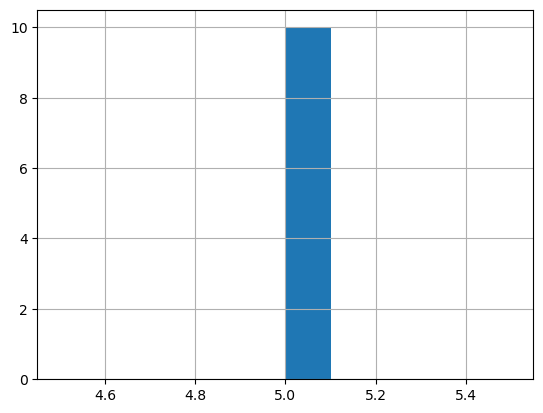

In [33]:
df_sample['keywords'].apply(len).hist()

## Named entity recognition using ChatGPT

OpenAI's ChatGPT can be utilized for named entity recognition by leveraging its large-scale language understanding capabilities. ChatGPT may implicitly recognize named entities based on the context provided in the text. While GPT may not be specifically fine-tuned for NER, it can still provide valuable insights into entities mentioned in the text.

In [41]:
article = df_sample['content.cleaned'].iloc[0]
article

'  Recognizing the evolving digital landscape shaped by technical advancements and socio-technical realities, professionals discussed the impact of digital advancements on Philippine democracy and rights in the Philippine Declaration of Internet Rights and Principles (PhilDec 2.0).      The plenary session of the Digital Rights Conference, held at Ateneo de Manila University last Thursday, March 21, also featured discussions on several key points, including artificial intelligence (AI), human rights, gender, environmental sustainability, and the post-pandemic digital ecosystems.      Alan Alegre, former executive director of the Foundation for Media Alternatives (FMA), along with other information and communications technology (ICT), media and human rights experts, stressed the need for an updated declaration. It addresses challenges made more difficult by the digital economy, such as the digital divide, hijacked democracies, disinformation, and the post-pandemic effects on digital rig

In [43]:
system_prompt = """
You work as a media analyst specializing in identifying relevant individuals and organizations mentioned in news articles.
"""

main_prompt = """
###TASK###
Identify ALL INDIVIDUALS and ORGANIZATIONS mentioned in the following article who are important for understanding the article itself.

- Focus only on people and organizations.
- When listing entities, include their full names as indicated in the article.
- Do NOT include titles or extra labels.
- If multiple relevant entities are mentioned, list them in a semi-colon-separated format along with their entity type, PERSON or ORGANIZATION. 
- Example: Elon Musk,PERSON; SpaceX,ORGANIZATION
- If no relevant entities are mentioned, return NONE

###ARTICLE###
"""

In [51]:
response = client.chat.completions.create(
    model = 'gpt-3.5-turbo',
    messages = [
        {'role': 'system', 'content': system_prompt},
        {'role': 'user', 'content': f'{main_prompt}\n {article}'}
]
)
keywords = response.choices[0].message.content
[kw.strip() for kw in keywords.split(',')]

['Alan Alegre',
 'PERSON; Foundation for Media Alternatives (FMA)',
 'ORGANIZATION; Ateneo de Manila University',
 'ORGANIZATION; Programme for International Student Assessment (PISA)',
 'ORGANIZATION; Dominic Ligot',
 'PERSON; CirroLytix',
 'ORGANIZATION; Data Ethics PH',
 'ORGANIZATION; Emmanuel Lallana',
 'PERSON; IdeaCorp Inc.',
 'ORGANIZATION']

We also demonstrate a sample pipeline for named entity recognition with ChatGPT.

In [67]:

# Function to extract entities using GPT
def extract_entities(text):
    system_prompt = """
    You work as a media analyst specializing in identifying relevant individuals and organizations mentioned in news articles.
    """

    main_prompt = """
    ###TASK###
    Identify ALL INDIVIDUALS and ORGANIZATIONS mentioned in the following article who are important for understanding the article itself.

    - Focus only on people and organizations.
    - When listing entities, include their full names as indicated in the article.
    - Do NOT include titles or extra labels.
    - If multiple relevant entities are mentioned, list them in a semi-colon-separated format along with their entity type, PERSON or ORGANIZATION. 
    - Example: Elon Musk,PERSON; SpaceX,ORGANIZATION
    - If no relevant entities are mentioned, return NONE

    ###ARTICLE###
    """
    try:
          response = client.chat.completions.create(
              model='gpt-3.5-turbo',
              messages=[
                  {'role': 'system', 'content': system_prompt},
                  {'role': 'user', 'content': f'{main_prompt}\n{text}'}
                  ]
          )

          entities = response.choices[0].message.content
          return [(i[0].strip(), i[1].strip()) for ent in entities.split(';') for i in [ent.split(',')]]
    except Exception as e:
        print(e)
        return []

In [69]:
df_sample['entities'] = df_sample['content.cleaned'].apply(extract_entities)
df_sample

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned,keywords,entities
0,2631396,phildec-2-experts-discuss-digital-rights-democ...,PhilDec 2.0: Experts discuss digital rights an...,\n<p>Recognizing the evolving digital landscap...,<p>&#8216;The digital economy as we were looki...,https://www.rappler.com/technology/phildec-2-e...,2024-03-31T11:13:32,2024-04-03T10:35:38,[732],PhilDec 2.0: Experts discuss digital rights an...,Recognizing the evolving digital landscape s...,"[digital advancements, AI, human rights, gende...","[(Alan Alegre, PERSON), (Foundation for Media ..."
1,2629524,moving-flood-prone-government-facilities-costl...,Moving flood-prone gov’t facilities out of har...,"\n<p class=""has-text-align-center""><strong>REA...",<p>Part 2: Experts say that moving all critica...,https://www.rappler.com/environment/moving-flo...,2024-03-29T08:30:00,2024-03-28T14:02:53,"[16490, 793, 709, 708, 701]",Moving flood-prone gov't facilities out of har...,READ: Part 1 | Flood-prone lifelines: Cr...,"[critical facilities, flood-prone areas, reloc...","[(Gina Lizares, PERSON), (Rappler, ORGANIZATIO..."
2,2629483,critical-facilities-risk-flooding-sipalay-city...,Flood-prone lifelines: Critical facilities at ...,"\n<p class=""has-drop-cap"">NEGROS OCCIDENTAL, P...",<p>Part 1: Rappler&#8217;s data analysis of Ha...,https://www.rappler.com/environment/critical-f...,2024-03-28T08:30:00,2024-04-01T11:12:08,"[16490, 793, 709, 708, 701]",Flood-prone lifelines: Critical facilities at ...,"NEGROS OCCIDENTAL, Philippines - It was pitc...","[flood, survival, typhoon, evacuation center, ...","[(Felizardo dela Cruz, PERSON), (Gustavo Gonza..."
3,2629925,medical-technologists-licensure-march-2024,RESULTS: March 2024 Medical Technologists Lice...,\n<p><em>The following is a press release from...,"<p>PRESS RELEASE: 7,309 out of 9,068 examinees...",https://www.rappler.com/bulletin-board/examina...,2024-03-27T19:10:25,2024-03-27T19:21:33,"[620, 21932]",RESULTS: March 2024 Medical Technologists Lice...,The following is a press release from the P...,"[keywords: Professional Regulation Commission,...","[(Professional Regulation Commission, ORGANIZA..."
4,2629187,free-to-disagree-despicable-broadcasters-who-i...,"[Free to disagree] Patiño and Tabar: Dim, devi...",\n<p>For most of my professional life I have b...,<p>The Cebu broadcasters should be held to acc...,https://www.rappler.com/voices/thought-leaders...,2024-03-27T14:32:20,2024-03-27T14:32:25,[758],"[Free to disagree] Patino and Tabar: Dim, devi...",For most of my professional life I have been...,"[crucial keywords: counseling services, media ...","[(Sylvia Estrada Claudio, PERSON), (Dennes Tab..."
5,2628868,process-kids-aged-1-4-get-national-id,Here’s the step-by-step process of getting nat...,"\n<p>MANILA, Philippines – The Philippine Stat...",<p>Here&#8217;s the list of requirements to re...,https://www.rappler.com/business/process-kids-...,2024-03-26T13:52:55,2024-03-26T13:53:01,"[621, 622]",Here's the step-by-step process of getting nat...,"MANILA, Philippines - The Philippine Statist...",[1. Philippine Statistics Authority (PSA)\n2. ...,"[(Philippine Statistics Authority, ORGANIZATIO..."
6,2628814,online-dswd-form-education-aid-fake,FACT CHECK: Online DSWD form for education aid...,\n<p><strong>Claim:</strong> The Department of...,<p>The Department of Social Welfare and Develo...,https://www.rappler.com/newsbreak/fact-check/o...,2024-03-26T13:02:37,2024-03-26T13:03:13,"[712, 708]",FACT CHECK: Online DSWD form for education aid...,Claim: The Department of Social Welfare an...,[- DSWD\n- education assistance\n- fake applic...,[(Department of Social Welfare and Development...
7,2628421,de-la-salle-university-students-win-grant-cafe...,DLSU students win P1-million grant for cafeter...,"\n<p>MANILA, Philippines – Three students from...","<p>Every year, De La Salle University’s cafete...",https://www.rappler.com/environment/de-la-sall...

## Exercise: Keyword Extraction and NER using ChatGPT (Breakout, 20 mins)


__Objective__

Perform keyword extraction and NER on a new set of news articles and compare results with traditional methods.


__Tasks__
* Select keyword(s) to filter the data to a specific subset.
* Use the `content.cleaned` column of the filtered data for the prompt. 
* Use GPT to extract keywords from the new articles.
* Use GPT to identify named entities in the new articles.
* Also apply traditional methods (TF-IDF for keyword extraction and SpaCy for NER) on the same articles for comparison.
* Compare the results from GPT with those from traditional methods and discuss the following points.
    - Relevance of the keywords extracted using ChatGPT
    - Accuracy of the named entities identified by ChatGPT
    - How do the results from GPT compare with traditional methods? Are there any significant differences in the relevance or accuracy?

In [71]:
df = pd.read_csv('rappler-2024-cleaned.csv')

keyword = 'government'

df_sample = df[
    (df['title.cleaned'].str.contains(keyword, case=False)) |
    (df['content.cleaned'].str.contains(keyword, case=False))
].reset_index(drop=True).head(10).copy()

df_sample

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned
0,2631656,national-council-churches-philippines-prayer-e...,Christian churches pray for Easter hope despit...,"\n<p>MANILA, Philippines – More than 400 Chris...",<p>The National Council of Churches in the Phi...,https://www.rappler.com/philippines/national-c...,2024-03-31T22:51:04,2024-04-01T12:24:30,"[697, 20536]",Christian churches pray for Easter hope despit...,"MANILA, Philippines - More than 400 Christia..."
1,2631379,the-whistleblower,The whistleblower,"\n<p class=""has-text-align-center""><em>Editor&...","<p>A former manager, American Joshua Farinella...",https://www.rappler.com/newsbreak/investigativ...,2024-03-31T15:57:02,2024-03-31T16:04:51,"[763, 762, 710, 768]",The whistleblower,Editor's Note: This story was produced by ...
2,2631477,tayyip-erdogan-battles-key-rival-turkey-local-...,Erdogan battles key rival in Turkey&#8217;s lo...,"\n<p>ISTANBUL, Turkey – Turks began voting on ...",<p>The results are likely to be shaped in part...,https://www.rappler.com/world/middle-east/tayy...,2024-03-31T14:05:48,2024-03-31T14:05:53,"[766, 761]",Erdogan battles key rival in Turkey's local el...,"ISTANBUL, Turkey - Turks began voting on Sun..."
3,2631410,things-to-know-executive-order-57-bolster-coun...,"What is EO 57, which bolsters PH maritime secu...","\n<p>MANILA, Philippines – As China continues ...",<p>President Ferdinand Marcos Jr. creates the ...,https://www.rappler.com/philippines/things-to-...,2024-03-31T12:08:21,2024-03-31T18:59:03,"[697, 20536]","What is EO 57, which bolsters PH maritime secu...","MANILA, Philippines - As China continues to ..."
4,2628423,watchdogs-mouthpieces-public-relations-redefin...,From watchdogs to mouthpieces: PR redefines ne...,"\n<p class=""has-drop-cap"">CAGAYAN DE ORO, Phil...",<p>The effect of PR-dominated reportage has se...,https://www.rappler.com/newsbreak/in-depth/wat...,2024-03-30T19:55:46,2024-03-30T19:55:52,"[16490, 709, 702, 20536, 696]",From watchdogs to mouthpieces: PR redefines ne...,"CAGAYAN DE ORO, Philippines - Communications..."
5,2631278,united-states-new-visa-curbs-hong-kong-officia...,US to impose new visa curbs on Hong Kong offic...,"\n<p>WASHINGTON, USA – The United States said ...",<p>The United States has imposed visa restrict...,https://www.rappler.com/world/asia-pacific/uni...,2024-03-30T16:20:24,2024-03-30T16:20:31,"[763, 761]",US to impose new visa curbs on Hong Kong offic...,"WASHINGTON, USA - The United States said on ..."
6,2631274,radio-free-asia-shuts-hong-kong-bureau-securit...,US-funded Radio Free Asia shuts Hong Kong bure...,\n<p>HONG KONG –&nbsp;United States-funded&nbs...,<p>Critics say the security law gives authorit...,https://www.rappler.com/world/asia-pacific/rad...,2024-03-30T15:57:24,2024-03-30T15:59:40,"[763, 761]",US-funded Radio Free Asia shuts Hong Kong bure...,HONG KONG - United States-funded Radio Free ...
7,2631134,kaguran-traditional-grating-tool-philippines,This traditional grating tool is vanishing fro...,"\n<p>GENERAL SANTOS, Philippines – An old Visa...",<p>The kaguran is used to grate the meat of ma...,https://www.rappler.com/philippines/visayas/ka...,2024-03-30T10:08:55,2024-03-30T13:54:48,"[20536, 701]",This traditional grating tool is vanishing fro...,"GENERAL SANTOS, Philippines - An old Visayan..."
8,2630881,in-prison-mother-baby-share-85-pesos-daily-foo...,"In prison, mother and baby share P85 a day for...","\n<p class=""has-text-align-center""><strong>Fir...",<p>Part 1: Even with their own ward at the Cor...,https://www.rappler.com/newsbreak/in-depth/in-...,2024-03-30T09:16:53,2024-03-31T22:38:11,"[16490, 709, 697, 708, 20536]","In prison, mother and baby share P85 a day for...",First of 2 parts Editor's Note: This...
9,2630941,photos-filipinos-observe-good-friday-2024,IN PHOTOS: How Filipinos observed Good Friday ...,"\n<p>MANILA, Philippines – Filipinos observing...",<p>Here are some scenes from this year&#82

In [75]:
df_sample.shape

(10, 11)

In [73]:
api_key = open('openaiapikey.txt', 'r').read()
client = OpenAI(api_key=api_key)

In [77]:
article = df_sample['content.cleaned'].iloc[0]
article

'  MANILA, Philippines - More than 400 Christians gathered at Bantayog ng mga Bayani, a  memorial for victims  of the Marcos dictatorship, to celebrate the resurrection of Christ in the face of the Philippines\' problems under the second Marcos presidency.      The 61-year-old National Council of Churches in the Philippines (NCCP), the largest alliance of Christian churches in this predominantly Catholic country, held its 75th Ecumenical Easter Sunrise Service at the Bantayog ng mga Bayani from 4:30 to 7 am on Easter Sunday, March 31.      In this Easter service, various prayer leaders took turns in praying to the "God of freedom" for "genuine justice and peace," for the safety of Filipino fishermen in the face of China\'s bullying in the West Philippine Sea, and for assistance to migrants and workers.      The prayers at the ecumenical service also sought to uphold the rights of indigenous people and cultural communities against "exploitative and oppressive systems," to defend women "

In [85]:
# Function to extract keywords using GPT
def extract_keywords(text):
    system_prompt = 'You are a news analyst assistant tasked to extract keywords from news articles.'

    main_prompt = """
    ###TASK###
    Extract the five most crucial keywords from the news article and present them in a comma-separated list.
    
    ###ARTICLE###
    """
    try:
        response = client.chat.completions.create(
        model='gpt-3.5-turbo',
        messages = [
            {'role': 'system', 'content': system_prompt},
            {'role': 'user',
             'content': f'{main_prompt}\n{text}'   
        }
        ]
        )
    
        keywords = response.choices[0].message.content
        return[kw.strip() for kw in keywords.split(',')]
        
    except Exception as e:
        print(e)
        return []
        

In [87]:
df_sample['keywords'] = df_sample['content.cleaned'].apply(extract_keywords)
df_sample

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned,entities,keywords
0,2631656,national-council-churches-philippines-prayer-e...,Christian churches pray for Easter hope despit...,"\n<p>MANILA, Philippines – More than 400 Chris...",<p>The National Council of Churches in the Phi...,https://www.rappler.com/philippines/national-c...,2024-03-31T22:51:04,2024-04-01T12:24:30,"[697, 20536]",Christian churches pray for Easter hope despit...,"MANILA, Philippines - More than 400 Christia...","[(Bishop Melzar Labuntog, PERSON), (NCCP - Nat...","[memorial, Easter, Philippines, Marcos dictato..."
1,2631379,the-whistleblower,The whistleblower,"\n<p class=""has-text-align-center""><em>Editor&...","<p>A former manager, American Joshua Farinella...",https://www.rappler.com/newsbreak/investigativ...,2024-03-31T15:57:02,2024-03-31T16:04:51,"[763, 762, 710, 768]",The whistleblower,Editor's Note: This story was produced by ...,"[(Joshua Farinella, PERSON), (Choice Canning, ...","[workers, shrimp processing plant, Choice Cann..."
2,2631477,tayyip-erdogan-battles-key-rival-turkey-local-...,Erdogan battles key rival in Turkey&#8217;s lo...,"\n<p>ISTANBUL, Turkey – Turks began voting on ...",<p>The results are likely to be shaped in part...,https://www.rappler.com/world/middle-east/tayy...,2024-03-31T14:05:48,2024-03-31T14:05:53,"[766, 761]",Erdogan battles key rival in Turkey's local el...,"ISTANBUL, Turkey - Turks began voting on Sun...","[(Ekrem Imamoglu, PERSON), (Tayyip Erdogan, PE...","[elections, Turkey, Istanbul, Erdogan, Imamoglu]"
3,2631410,things-to-know-executive-order-57-bolster-coun...,"What is EO 57, which bolsters PH maritime secu...","\n<p>MANILA, Philippines – As China continues ...",<p>President Ferdinand Marcos Jr. creates the ...,https://www.rappler.com/philippines/things-to-...,2024-03-31T12:08:21,2024-03-31T18:59:03,"[697, 20536]","What is EO 57, which bolsters PH maritime secu...","MANILA, Philippines - As China continues to ...","[(President Ferdinand Marcos Jr., PERSON), (Ex...","[Philippines, China, maritime security, West P..."
4,2628423,watchdogs-mouthpieces-public-relations-redefin...,From watchdogs to mouthpieces: PR redefines ne...,"\n<p class=""has-drop-cap"">CAGAYAN DE ORO, Phil...",<p>The effect of PR-dominated reportage has se...,https://www.rappler.com/newsbreak/in-depth/wat...,2024-03-30T19:55:46,2024-03-30T19:55:52,"[16490, 709, 702, 20536, 696]",From watchdogs to mouthpieces: PR redefines ne...,"CAGAYAN DE ORO, Philippines - Communications...","[(Bencyrus Ellorin, PERSON), (Rolando ""Klarex""...","[###KEYWORDS###\nsocial media campaigns, domin..."
5,2631278,united-states-new-visa-curbs-hong-kong-officia...,US to impose new visa curbs on Hong Kong offic...,"\n<p>WASHINGTON, USA – The United States said ...",<p>The United States has imposed visa restrict...,https://www.rappler.com/world/asia-pacific/uni...,2024-03-30T16:20:24,2024-03-30T16:20:31,"[763, 761]",US to impose new visa curbs on Hong Kong offic...,"WASHINGTON, USA - The United States said on ...","[(Paul Lam, PERSON), (Raymond Siu, PERSON), (A...","[visa restrictions, Hong Kong officials, crack..."
6,2631274,radio-free-asia-shuts-hong-kong-bureau-securit...,US-funded Radio Free Asia shuts Hong Kong bure...,\n<p>HONG KONG –&nbsp;United States-funded&nbs...,<p>Critics say the security law gives authorit...,https://www.rappler.com/world/asia-pacific/rad...,2024-03-30T15:57:24,2024-03-30T15:59:40,"[763, 761]",US-funded Radio Free Asia shuts Hong Kong bure...,HONG KONG - United States-funded Radio Free ...,"[(Bay Fang, PERSON), (Antony Blinken, PERSON),...","[national security law, Hong Kong, RFA, media ..."
7,2631134,kaguran-traditional-grating-tool-philippines,This traditional grating tool is vanishing fro...,"\n<p>GENERAL SANTOS, Philippines – An old Visa...",<p>The kaguran is used to grate the meat of ma...,https://www.rappler.com/philippines/visayas/ka...,2024-03-30T10:08:55,2024-03-30T13:

In [89]:

# Function to extract entities using GPT
def extract_entities(text):
    system_prompt = """
    You work as a media analyst specializing in identifying relevant individuals and organizations mentioned in news articles.
    """

    main_prompt = """
    ###TASK###
    Identify ALL INDIVIDUALS and ORGANIZATIONS mentioned in the following article who are important for understanding the article itself.

    - Focus only on people and organizations.
    - When listing entities, include their full names as indicated in the article.
    - Do NOT include titles or extra labels.
    - If multiple relevant entities are mentioned, list them in a semi-colon-separated format along with their entity type, PERSON or ORGANIZATION. 
    - Example: Elon Musk,PERSON; SpaceX,ORGANIZATION
    - If no relevant entities are mentioned, return NONE

    ###ARTICLE###
    """
    try:
          response = client.chat.completions.create(
              model='gpt-3.5-turbo',
              messages=[
                  {'role': 'system', 'content': system_prompt},
                  {'role': 'user', 'content': f'{main_prompt}\n{text}'}
                  ]
          )

          entities = response.choices[0].message.content
          return [(i[0].strip(), i[1].strip()) for ent in entities.split(';') for i in [ent.split(',')]]
    except Exception as e:
        print(e)
        return []

In [91]:
df_sample['entities'] = df_sample['content.cleaned'].apply(extract_entities)
df_sample

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned,entities,keywords
0,2631656,national-council-churches-philippines-prayer-e...,Christian churches pray for Easter hope despit...,"\n<p>MANILA, Philippines – More than 400 Chris...",<p>The National Council of Churches in the Phi...,https://www.rappler.com/philippines/national-c...,2024-03-31T22:51:04,2024-04-01T12:24:30,"[697, 20536]",Christian churches pray for Easter hope despit...,"MANILA, Philippines - More than 400 Christia...","[(Bantayog ng mga Bayani, ORGANIZATION), (Nati...","[memorial, Easter, Philippines, Marcos dictato..."
1,2631379,the-whistleblower,The whistleblower,"\n<p class=""has-text-align-center""><em>Editor&...","<p>A former manager, American Joshua Farinella...",https://www.rappler.com/newsbreak/investigativ...,2024-03-31T15:57:02,2024-03-31T16:04:51,"[763, 762, 710, 768]",The whistleblower,Editor's Note: This story was produced by ...,"[(Joshua Farinella, PERSON), (The Outlaw Ocean...","[workers, shrimp processing plant, Choice Cann..."
2,2631477,tayyip-erdogan-battles-key-rival-turkey-local-...,Erdogan battles key rival in Turkey&#8217;s lo...,"\n<p>ISTANBUL, Turkey – Turks began voting on ...",<p>The results are likely to be shaped in part...,https://www.rappler.com/world/middle-east/tayy...,2024-03-31T14:05:48,2024-03-31T14:05:53,"[766, 761]",Erdogan battles key rival in Turkey's local el...,"ISTANBUL, Turkey - Turks began voting on Sun...","[(Faruk Baran, PERSON), (Ekrem Imamoglu, PERSO...","[elections, Turkey, Istanbul, Erdogan, Imamoglu]"
3,2631410,things-to-know-executive-order-57-bolster-coun...,"What is EO 57, which bolsters PH maritime secu...","\n<p>MANILA, Philippines – As China continues ...",<p>President Ferdinand Marcos Jr. creates the ...,https://www.rappler.com/philippines/things-to-...,2024-03-31T12:08:21,2024-03-31T18:59:03,"[697, 20536]","What is EO 57, which bolsters PH maritime secu...","MANILA, Philippines - As China continues to ...","[(Ferdinand Marcos Jr., PERSON), (Lucas Bersam...","[Philippines, China, maritime security, West P..."
4,2628423,watchdogs-mouthpieces-public-relations-redefin...,From watchdogs to mouthpieces: PR redefines ne...,"\n<p class=""has-drop-cap"">CAGAYAN DE ORO, Phil...",<p>The effect of PR-dominated reportage has se...,https://www.rappler.com/newsbreak/in-depth/wat...,2024-03-30T19:55:46,2024-03-30T19:55:52,"[16490, 709, 702, 20536, 696]",From watchdogs to mouthpieces: PR redefines ne...,"CAGAYAN DE ORO, Philippines - Communications...","[(Bencyrus Ellorin, PERSON), (Rolando ""Klarex""...","[###KEYWORDS###\nsocial media campaigns, domin..."
5,2631278,united-states-new-visa-curbs-hong-kong-officia...,US to impose new visa curbs on Hong Kong offic...,"\n<p>WASHINGTON, USA – The United States said ...",<p>The United States has imposed visa restrict...,https://www.rappler.com/world/asia-pacific/uni...,2024-03-30T16:20:24,2024-03-30T16:20:31,"[763, 761]",US to impose new visa curbs on Hong Kong offic...,"WASHINGTON, USA - The United States said on ...","[(Paul Lam, PERSON), (Raymond Siu, PERSON), (A...","[visa restrictions, Hong Kong officials, crack..."
6,2631274,radio-free-asia-shuts-hong-kong-bureau-securit...,US-funded Radio Free Asia shuts Hong Kong bure...,\n<p>HONG KONG –&nbsp;United States-funded&nbs...,<p>Critics say the security law gives authorit...,https://www.rappler.com/world/asia-pacific/rad...,2024-03-30T15:57:24,2024-03-30T15:59:40,"[763, 761]",US-funded Radio Free Asia shuts Hong Kong bure...,HONG KONG - United States-funded Radio Free ...,"[(Bay Fang, PERSON), (Antony Blinken, PERSON),...","[national security law, Hong Kong, RFA, media ..."
7,2631134,kaguran-traditional-grating-tool-philippines,This traditional grating tool is vanishing fro...,"\n<p>GENERAL SANTOS, Philippines – An old Visa...",<p>The kaguran is used to grate the meat of ma...,https://www.rappler.com/philippines/visayas/ka...,2024-03-30T10:08:55,2024-03-30T13:

In [95]:
# in case may nag-blank / index out of range, replug it individually 
#extract_entities(df_sample.loc[1,'content.cleaned']

In [ ]:
re